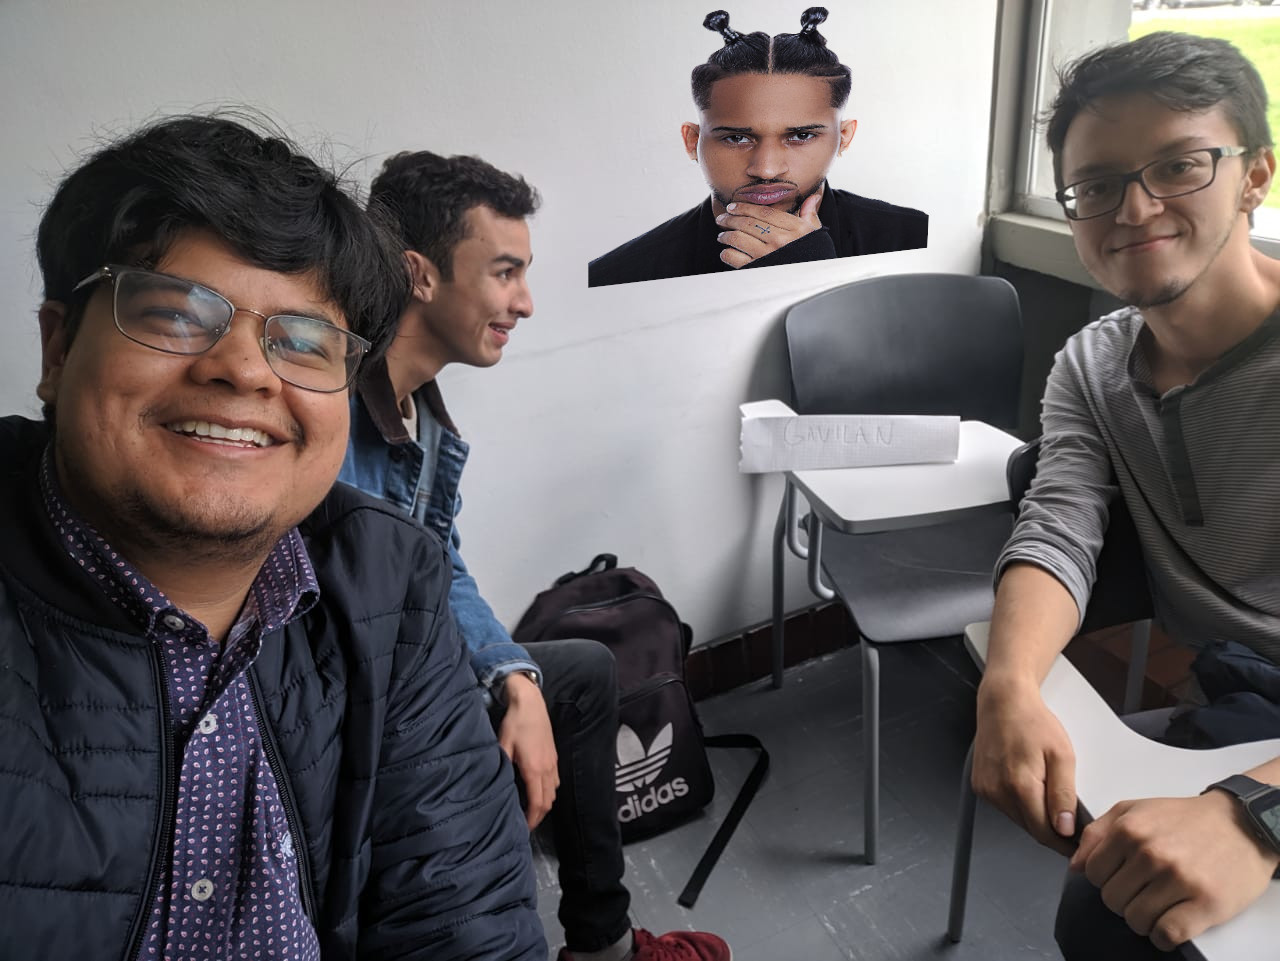

In [2]:
import IPython.display as ipd
ipd.Image(filename="D:\\edicion\\grupo estocasticos.jpeg")

In [3]:
import subprocess
import os.path
from os import path
from time import time
import pickle

In [6]:
def save_data(filename, friends):  
    with open(filename, 'wb') as fp:
        pickle.dump(friends, fp)


def load_data(filename):
    with open(filename, 'rb') as fp:
        data = pickle.load(fp)
    return data

def get_friends(username):
    print("trying with: " + username)
    friend_path = os.path.join("friends_data" , username + ".txt")
    if not path.exists(friend_path):
        friendlist = []
        attempts = 0
        while not friendlist and attempts < 5:
            start = time()
            clicommand = subprocess.run(["twint", "-u", username, "--following"], stdout=subprocess.PIPE)    #twint -u username --followers
            friends = clicommand.stdout.decode("utf-8")
            friendlist = friends.splitlines()
            final_time = time() - start  
            print(f"saving {username} friends took: {final_time // 60 :.0f}m {final_time % 60 :.0f}s")
            save_data(friend_path, friendlist)
            attempts += 1
        return friendlist
    else:
        return load_data(friend_path)


In [12]:
friendlist = get_friends("BumaEl")
friendlist

trying with: BumaEl
saving BumaEl friends took: 0m 23s


['EddyG22090921',
 'chocochipspao',
 'sofianutria',
 'milimetrito',
 'MaraFer88633966',
 'NatyBarrios_',
 'maryneyla_',
 'andreadhc2',
 'Valentinah_29',
 'ClavijoPichler',
 'camilafrancoh8',
 'NHiguaran',
 'anniecerrato1',
 'UglyForeverr',
 'AlobienPerro',
 'Ohayousoroooo',
 'PhillipDSX',
 'DatenshiYohane5',
 'tejon_don',
 'Alejo_Higuaran',
 'CamilAcevedo654',
 'DillionHarper',
 'SashaGrey',
 'juanitta_r',
 'nilomandeDior',
 'JBalvinCucutaFc',
 'JBALVIN',
 'OlivasRickardo',
 'coach_marcela',
 'MemesMcLovin',
 'MaraUrl',
 'MillosFCoficial',
 'AsoDeporCali',
 'unlocodel77',
 'CaliWebCo',
 'MarcMerrill',
 'MaxTheDragon12',
 'lapis_punished',
 'MurciaShelsea',
 'Bayron69416403',
 'Eduardo52183837',
 'villavocompeti',
 'AppleArcade',
 'EfectoStudios',
 'slabcode',
 'Globant',
 'coursera',
 'AndrewYNg',
 'JorgeRoln2',
 'Okina_Mune',
 'MantillaIgnacio',
 'Negriet',
 'hololivetv',
 'jamesdrodriguez',
 'Pablolopezsoto',
 'tonas_tristano',
 'cloudseongmini',
 'Cuadrado',
 'fundacionmessi',
 'agu

In [13]:
for friend in friendlist:
    get_friends(friend)

trying with: EddyG22090921
saving EddyG22090921 friends took: 0m 52s
trying with: chocochipspao
trying with: sofianutria
trying with: milimetrito
trying with: MaraFer88633966
trying with: NatyBarrios_
trying with: maryneyla_
trying with: andreadhc2
trying with: Valentinah_29
trying with: ClavijoPichler
trying with: camilafrancoh8
trying with: NHiguaran
trying with: anniecerrato1
trying with: UglyForeverr
trying with: AlobienPerro
trying with: Ohayousoroooo
trying with: PhillipDSX
trying with: DatenshiYohane5
trying with: tejon_don
trying with: Alejo_Higuaran
trying with: CamilAcevedo654
trying with: DillionHarper
trying with: SashaGrey
trying with: juanitta_r
trying with: nilomandeDior
trying with: JBalvinCucutaFc
trying with: JBALVIN
trying with: OlivasRickardo
trying with: coach_marcela
trying with: MemesMcLovin
trying with: MaraUrl
trying with: MillosFCoficial
trying with: AsoDeporCali
trying with: unlocodel77
trying with: CaliWebCo
trying with: MarcMerrill
trying with: MaxTheDragon

In [14]:
len(friendlist)

75

In [16]:
import networkx as nx

data_directory = "friends_data"
SocialNetwork = nx.DiGraph()

# Load everyone's friends except mine as nodes in our graph
for filename in os.listdir(data_directory):
    friend_path = os.path.join(data_directory , filename)
    if (filename != "BumaEl.txt"):
         with open(friend_path, 'rb') as f:
            screen_name = filename.replace(".txt","")
            friends = pickle.load(f)
            
            SocialNetwork.add_node(screen_name,is_friend=True)

            # Add all of my friend's friends
            for friend in friends:
                    # If this friend is in Bert's list of friends, assign the is_friend attribute appropriately
                    if friend in friendlist:
                        is_friend = True
                    else:
                        is_friend = False

                    SocialNetwork.add_node(friend, is_friend = is_friend)
                    SocialNetwork.add_edge(screen_name,friend)

In [19]:
# Find the people with the highest number of edges, filtering out the ones that are already my friends
degrees = [{"screen_name": n[0],  "degrees": list(nx.degree(SocialNetwork,n))[0][1]} for n in nx.get_node_attributes(SocialNetwork,'is_friend').items() if n[1] == False]
sorted_degrees = sorted(degrees, key=lambda k:k["degrees"], reverse=True)

# Get the top 50
top_50 = sorted_degrees[1:50]
top_50

[{'screen_name': 'rihanna', 'degrees': 9},
 {'screen_name': 'ArianaGrande', 'degrees': 8},
 {'screen_name': 'justinbieber', 'degrees': 8},
 {'screen_name': 'auronplay', 'degrees': 8},
 {'screen_name': 'IvanDuque', 'degrees': 8},
 {'screen_name': 'CNNEE', 'degrees': 8},
 {'screen_name': 'DanielSamperO', 'degrees': 7},
 {'screen_name': 'LuisitoComunica', 'degrees': 7},
 {'screen_name': 'JuanpaZurita', 'degrees': 7},
 {'screen_name': 'IndirectasRock', 'degrees': 7},
 {'screen_name': 'NASA', 'degrees': 7},
 {'screen_name': 'MinSaludCol', 'degrees': 7},
 {'screen_name': 'NetflixLAT', 'degrees': 7},
 {'screen_name': 'ELTIEMPO', 'degrees': 7},
 {'screen_name': 'elmundodejuanch', 'degrees': 7},
 {'screen_name': 'FALCAO', 'degrees': 7},
 {'screen_name': 'shakira', 'degrees': 6},
 {'screen_name': 'IbaiLlanos', 'degrees': 6},
 {'screen_name': 'RevistaSemana', 'degrees': 6},
 {'screen_name': 'Residente', 'degrees': 6},
 {'screen_name': 'cejaspobladas', 'degrees': 6},
 {'screen_name': 'Pochosaurus'

In [39]:
# Create a new graph that will only contain the top 50 friends of friends
data_directory = "friends_data"
FavoriteSocialNetwork = nx.DiGraph()

# Load me into the graph
FavoriteSocialNetwork.add_node("BumaEl", friend_tier=0)

# Add Buma's Friends      
with open(os.path.join(data_directory , "BumaEl.txt") , 'rb') as f:
        friends = pickle.load(f)
        for friend in friends:
            FavoriteSocialNetwork.add_node(friend, friend_tier=1)
            FavoriteSocialNetwork.add_edge("BumaEl",friend)

# Add Buma's Friends' Friends only if they appear in the top_50 list   
for filename in os.listdir(data_directory):
    friend_path = os.path.join(data_directory , filename)
    if (filename != "BumaEl.txt"):
        with open(friend_path, 'rb') as f:
            screen_name = filename.replace(".txt","")
            friends = pickle.load(f)

            for friend in friends:
                    # Add only the top_50 friends of friends
                    if any(d["screen_name"] == friend for d in top_50):  
                        FavoriteSocialNetwork.add_node(friend, friend_tier=2)
                        FavoriteSocialNetwork.add_edge(screen_name,friend)

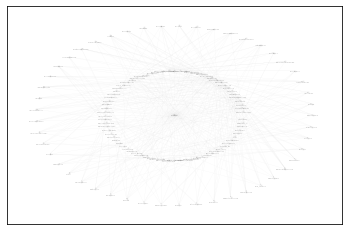

In [40]:
import matplotlib.pyplot as plt

# Shells are the circles that nodes appear on the graph
shell_level_1 = []
shell_level_2 = []

# Add nodes to the appropriate circle
for n in nx.get_node_attributes(FavoriteSocialNetwork,'friend_tier').items():
    if n[1] == 2:
        shell_level_2.append(n[0])
    else:
        shell_level_1.append(n[0])

shells = [shell_level_1,shell_level_2]
pos = nx.shell_layout(FavoriteSocialNetwork,shells,scale=500)
pos["BumaEl"] =[0,0]

nx.draw_networkx(FavoriteSocialNetwork,pos= pos,node_size=1,node_color="#cfcfcf",alpha=.3,arrowsize=1,font_size=2,width=.1,edge_color="#bdbdbd")
plt.savefig("Grapherras.png", dpi=1000)
plt.show()

In [32]:
shell_level_1 = []
shell_level_2 = []

# Add nodes to the appropriate circle
for n in nx.get_node_attributes(FavoriteSocialNetwork,'friend_tier').items():
    if n[1] == 2:
        shell_level_2.append(n[0])
    else:
        shell_level_1.append(n[0])
shells = [shell_level_1,shell_level_2]
pos = nx.shell_layout(FavoriteSocialNetwork,shells,scale=500)
pos

{'BumaEl': array([ 2.50000000e+02, -3.81505629e-07]),
 'Villavoalreves': array([249.28401184,  18.90718651]),
 'DavidMora_N': array([247.14013672,  37.70607376]),
 'DAVIDCASTRO_09': array([243.58068848,  56.28898239]),
 'romeromario87': array([238.62602234,  74.54948425]),
 'OscarLozanoRamo': array([232.30451965,  92.38295746]),
 'YagodeMarta': array([224.65238953, 109.68727875]),
 'RoyCampos': array([215.71350098, 126.36330414]),
 'PoliciaColombia': array([205.53900146, 142.31556702]),
 'DiegoVilla_CO': array([194.18721008, 157.45262146]),
 'UNIMINUTOVcio': array([181.72311401, 171.68782043]),
 'AsambleaMeta': array([168.21813965, 184.93960571]),
 'Semanaenvivo': array([153.74961853, 197.13208008]),
 'RevistaDinero': array([138.4004364 , 208.19538879]),
 'ForosSemana': array([122.25850677, 218.06617737]),
 'corcumvi': array([105.41627502, 226.68791199]),
 'BluRadioCo': array([ 87.97025299, 234.01118469]),
 'NoticiadelMeta': array([ 70.0203476 , 239.99406433]),
 'Concejo_Villavo': arra

In [38]:
len(FavoriteSocialNetwork)

190